In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
Train_set=pd.read_csv("C:/Users/91930/Downloads/titanic/train.csv",encoding = "ISO-8859-1")

In [4]:
Train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Train_set.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Eustis, Miss. Elizabeth Mussey",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<h3>missing values

In [7]:
missing=Train_set.isnull()
missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
for column in missing.columns.values.tolist():
    print(column)
    print(missing[column].value_counts())
    print("")

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



based on above <br>

Age has 177 missing , remaing 714 <br>
Cabin has 687 missing , remaing 204 <br>
Embarked has 2 missing , remaing 889 <br>

Text(0.5, 1.0, 'columns')

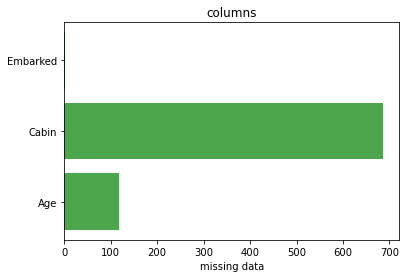

In [9]:
objects=('Age','Cabin','Embarked')
y_pos=np.arange(len(objects))
miss=[117,687,2]
plt.barh(y_pos, miss, align='center', color='g',alpha=0.7)
plt.yticks(y_pos, objects)
plt.xlabel('missing data')
plt.title('columns')

In [12]:
Train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Number of male and female')

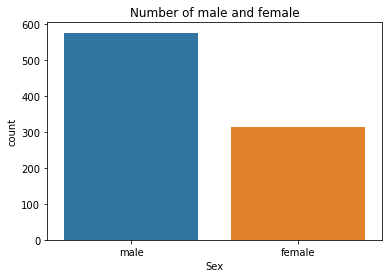

In [13]:
#number of male and females
sns.countplot(x='Sex',data=Train_set)
plt.title("Number of male and female")

Text(0.5, 1.0, 'Number of male and female who servived and who not ')

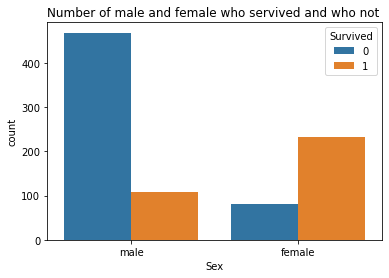

In [14]:
#number of male and female who servived
sns.countplot(x='Sex',hue='Survived',data=Train_set)
plt.title("Number of male and female who servived and who not ")

In [15]:
Train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Number of people in each ticket class ')

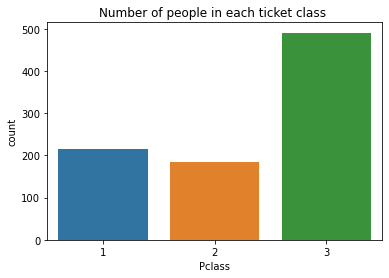

In [16]:
sns.countplot(x='Pclass',data=Train_set)
plt.title("Number of people in each ticket class ")

Text(0.5, 1.0, 'Serviers of each class ')

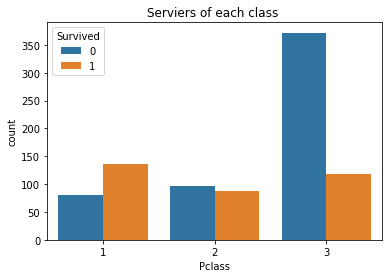

In [17]:
sns.countplot(x='Pclass',hue='Survived',data=Train_set)
plt.title("Serviers of each class ")

Text(0.5, 1.0, 'Age distribution ')

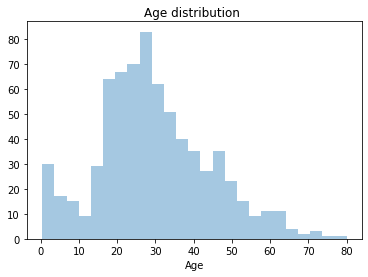

In [18]:
#dist of age
sns.distplot(Train_set['Age'],bins=25,kde=False)
plt.title("Age distribution ",pad=5)

based on this we can replace missing ages with there ticket class median

In [21]:
def missing_age_fill(cols):
    age=cols[0]
    ticket_class=cols[1]
    
    if pd.isnull(age):
        if ticket_class==1:
            return 37
        elif ticket_class==2:
            return 29
        else:
            return 24
    else:
        return age

In [22]:
#apply on age
Train_set['Age'] =  Train_set[['Age',"Pclass"]].apply(missing_age_fill,axis=1)

again checking for missing data

In [23]:
Train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
lst=['Sex']
embarked_err_remo = Train_set.groupby(lst).count()

In [25]:
embarked_err_remo.drop(['Survived','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [26]:
embarked_err_remo

,PassengerId,Pclass,Embarked
Sex,,,
female,314,314,312
male,577,577,577


the missing data of Embarked is of 2 womens of 1 Pclass

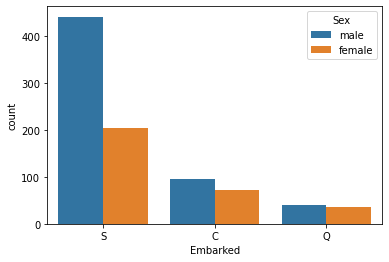

In [27]:
sns.countplot(x='Embarked',hue='Sex',data=Train_set)

most women of 1 Ticket class embarked from S

In [28]:
def missing_embarked_fill(cols):
    embarked=cols[0]
    
    if pd.isnull(embarked):
        return 'S'
    else:
        return embarked

In [29]:
Train_set['Embarked'] =  Train_set[['Embarked']].apply(missing_embarked_fill,axis=1)

In [30]:
#again check for missing data
Train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Cabin has about 80% missing values so we can drop the column or we can replace the missing value in this case i will drop the column

In [31]:
Train_set.drop(['Cabin'],axis=1,inplace=True)

In [32]:
Train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now our Train dataset is

In [33]:
Train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


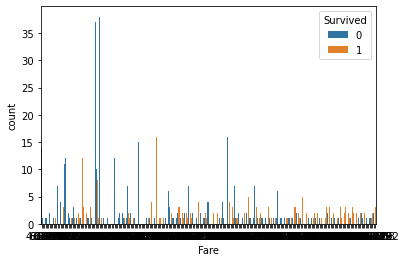

In [34]:
sns.countplot(x='Fare',hue='Survived',data=Train_set)

never mind ;)
we dont need PassengerId,Name,Ticket,Fare columns 

In [35]:
Train_set.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [36]:
Train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [37]:
#some ages are in float so convert them to there floor value
Train_set['Age']=Train_set['Age'].apply(np.floor)

In [38]:
Train_set.iloc[78,:]

Survived       1
Pclass         2
Sex         male
Age            0
SibSp          0
Parch          2
Embarked       S
Name: 78, dtype: object

<h3>dummyes

In [39]:
dummy1 = pd.get_dummies(Train_set['Sex'],drop_first=True)

In [40]:
Train_set = pd.concat([Train_set,dummy1],axis=1)

In [41]:
Train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


In [42]:
dummy2 = pd.get_dummies(Train_set['Embarked'],drop_first=True)
Train_set = pd.concat([Train_set,dummy2],axis=1)
Train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,male,22.0,1,0,S,1,0,1
1,1,1,female,38.0,1,0,C,0,0,0
2,1,3,female,26.0,0,0,S,0,0,1
3,1,1,female,35.0,1,0,S,0,0,1
4,0,3,male,35.0,0,0,S,1,0,1


In [43]:
#drop the columns sex and embarked
Train_set.drop(['Sex','Embarked'],axis=1,inplace=True)

In [44]:
Train_set.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


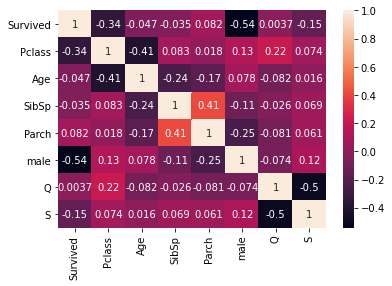

In [45]:
sns.heatmap(Train_set.corr(),annot=True)

In [46]:
y=Train_set.pop('Survived')
x=Train_set

<h3>feature scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
x[['Pclass','Age','SibSp','Parch']]=scaler.fit_transform(x[['Pclass','Age','SibSp','Parch']])

In [49]:
x.head()

,Pclass,Age,SibSp,Parch,male,Q,S
0,1.0,0.2750,0.125,0.0,1,0,1
1,0.0,0.4750,0.125,0.0,0,0,0
2,1.0,0.3250,0.000,0.0,0,0,1
3,0.0,0.4375,0.125,0.0,0,0,1
4,1.0,0.4375,0.000,0.0,1,0,1


In [50]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<h3>model building

In [51]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()

In [52]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg,5)
rfe=rfe.fit(x,y)

In [53]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False])

In [54]:
list(zip(x.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('male', True, 1),
 ('Q', False, 3),
 ('S', False, 2)]

In [55]:
col=x.columns[rfe.support_]

In [56]:
import statsmodels.api as sm

In [57]:
x_1=sm.add_constant(x[col])    

In [58]:
log1 = sm.GLM(y,x_1,family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.29
Date:                Fri, 28 Aug 2020   Deviance:                       786.58
Time:                        15:36:56   Pearson chi2:                     928.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2756      0.412     10.372      0.000       3.468       5.084
Pclass        -2.5212      0.254     -9.945      0.000      -3.018      -2.024
Age           -3.5278      0.649     -5.434      0.000      -4.800      -2.255
SibSp         -2.7908      0.872     -3.202      0.001      -4.499      -1.083
Parch         -0.4507      0.694     -0.649      0.516      -1.811       0.910
male          -2.7671      0.199    -13.879      0.000      -3.158      -2.376
==============================================================================
"""

drop Parch

In [59]:
x_1.drop(['Parch'],axis=1,inplace=True)

In [60]:
x_2=sm.add_constant(x_1)


In [61]:
log2= sm.GLM(y,x_2,family=sm.families.Binomial())
res2 = log2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.50
Date:                Fri, 28 Aug 2020   Deviance:                       787.01
Time:                        15:36:57   Pearson chi2:                     933.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2337      0.407     10.402      0.000       3.436       5.031
Pclass        -2.5210      0.254     -9.937      0.000      -3.018      -2.024
Age           -3.5106      0.648     -5.417      0.000      -4.781      -2.240
SibSp         -2.9643      0.834     -3.553      0.000      -4.599      -1.329
male          -2.7414      0.195    -14.062      0.000      -3.124      -2.359
==============================================================================
"""

p values looks good now vif

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()

In [64]:
vif['features'] = x_2.columns

In [65]:
vif['VIF'] = [variance_inflation_factor(x_2.values,i) for i in range(x_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF" , ascending=False)
vif

,features,VIF
0,const,14.95
2,Age,1.29
1,Pclass,1.24
3,SibSp,1.07
4,male,1.05


In [66]:
x_3=sm.add_constant(x_2)
log3= sm.GLM(y,x_3,family=sm.families.Binomial())
res3 = log3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.50
Date:                Fri, 28 Aug 2020   Deviance:                       787.01
Time:                        15:36:57   Pearson chi2:                     933.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2337      0.407     10.402      0.000       3.436       5.031
Pclass        -2.5210      0.254     -9.937      0.000      -3.018      -2.024
Age           -3.5106      0.648     -5.417      0.000      -4.781      -2.240
SibSp         -2.9643      0.834     -3.553      0.000      -4.599      -1.329
male          -2.7414      0.195    -14.062      0.000      -3.124      -2.359
==============================================================================
"""

In [67]:
y_pred = res3.predict(x_3)
y_pred[:10]

0    0.085910
1    0.899855
2    0.639177
3    0.911110
4    0.071453
5    0.110872
6    0.293718
7    0.097260
8    0.628995
9    0.879566
dtype: float64

In [68]:
y_pred = y_pred.values.reshape(-1)
y_pred[:10]

array([0.08590953, 0.89985521, 0.63917668, 0.91111015, 0.07145333,
       0.11087214, 0.29371781, 0.09725974, 0.62899541, 0.87956631])

In [69]:
y_pred_final = pd.DataFrame({'Servived':y.values,'Servivved_prob':y_pred})

In [70]:
y_pred_final.head()

,Servived,Servivved_prob
0,0,0.085910
1,1,0.899855
2,1,0.639177
3,1,0.911110
4,0,0.071453


In [71]:
y_pred_final['predicted'] = y_pred_final.Servivved_prob.map(lambda x:1 if x>0.5 else 0)

In [72]:
y_pred_final.head()

,Servived,Servivved_prob,predicted
0,0,0.085910,0
1,1,0.899855,1
2,1,0.639177,1
3,1,0.911110,1
4,0,0.071453,0


In [73]:
from sklearn import metrics

In [74]:
confusion = metrics.confusion_matrix(y_pred_final.Servived,y_pred_final.predicted)

In [75]:
print(confusion)

[[478  71]
 [101 241]]


In [76]:
print(metrics.accuracy_score(y_pred_final.Servived,y_pred_final.predicted))

0.8069584736251403


so we achived an accuracy of 80.69%

In [77]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
sensitivity = (TP / float(TP+FN))
sensitivity

0.7046783625730995

In [79]:
specificity = (TN / float(TN+FP))
specificity

0.8706739526411658

In [80]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.12932604735883424


In [81]:
# positive predictive value
print (TP / float(TP+FP))

0.7724358974358975


<h3>plotting ROC curve

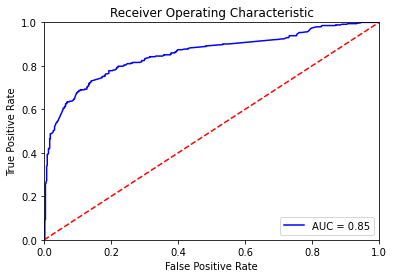

In [82]:
fpr,tpr, threshold = metrics.roc_curve(y_pred_final.Servived,y_pred_final.Servivved_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc=0.85 which is good
<br>finding optimal cutoff point

In [83]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Servivved_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()


,Servived,Servivved_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.085910,0,1,0,0,0,0,0,0,0,0,0
1,1,0.899855,1,1,1,1,1,1,1,1,1,1,0
2,1,0.639177,1,1,1,1,1,1,1,1,0,0,0
3,1,0.911110,1,1,1,1,1,1,1,1,1,1,1
4,0,0.071453,0,1,0,0,0,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Servived, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.523008  0.929825  0.269581
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.766554  0.815789  0.735883
0.4   0.4  0.794613  0.777778  0.805100
0.5   0.5  0.806958  0.704678  0.870674
0.6   0.6  0.810325  0.637427  0.918033
0.7   0.7  0.792368  0.502924  0.972678
0.8   0.8  0.763187  0.403509  0.987250
0.9   0.9  0.695847  0.213450  0.996357


<function matplotlib.pyplot.show(*args, **kw)>

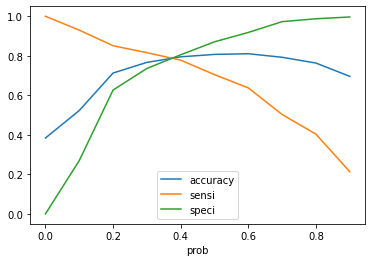

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show

from the curve above the optimum point should be taken as 0.4

In [86]:
y_pred_final['final_predicted'] = y_pred_final.Servivved_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_final.head()

,Servived,Servivved_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.085910,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.899855,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.639177,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.911110,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.071453,0,1,0,0,0,0,0,0,0,0,0,0


In [87]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Servived, y_pred_final.final_predicted)


0.8103254769921436

In [88]:
confusion2 = metrics.confusion_matrix(y_pred_final.Servived, y_pred_final.final_predicted )
confusion2

array([[504,  45],
       [124, 218]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6374269005847953

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9180327868852459

In [92]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.08196721311475409


In [93]:
# Positive predictive value
print (TP / float(TP+FP))

0.8288973384030418


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))


0.802547770700637


In [95]:
confusion = metrics.confusion_matrix(y_pred_final.Servived, y_pred_final.predicted )
confusion


array([[478,  71],
       [101, 241]], dtype=int64)

In [96]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7724358974358975

In [97]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7046783625730995

Precision and recall tradeoff

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
p, r, thresholds = precision_recall_curve(y_pred_final.Servived, y_pred_final.Servivved_prob)

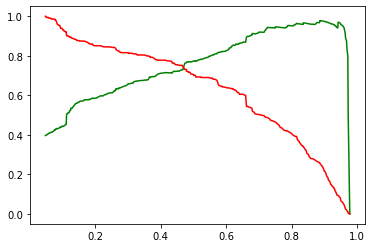

In [100]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<h3>Making predictions on the test set

In [101]:
test = pd.read_csv('C:/Users/91930/Downloads/titanic/test.csv')
survivors = pd.read_csv("C:/Users/91930/Downloads/titanic/gender_submission.csv")

In [102]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kreuchen, Miss. Emilie",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [104]:
survivors.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [105]:
survivors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [106]:
#combine the both dataset
Test_set = pd.merge(test,survivors,how='inner',on='PassengerId')

In [107]:
Test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [108]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [109]:
test_miss=Test_set.isnull()
test_miss

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False,False
416,False,False,False,False,True,False,False,False,False,True,False,False


In [110]:
for column in test_miss.columns.values.tolist():
    print(column)
    print(test_miss[column].value_counts())
    print("")

PassengerId
False    418
Name: PassengerId, dtype: int64

Pclass
False    418
Name: Pclass, dtype: int64

Name
False    418
Name: Name, dtype: int64

Sex
False    418
Name: Sex, dtype: int64

Age
False    332
True      86
Name: Age, dtype: int64

SibSp
False    418
Name: SibSp, dtype: int64

Parch
False    418
Name: Parch, dtype: int64

Ticket
False    418
Name: Ticket, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

Cabin
True     327
False     91
Name: Cabin, dtype: int64

Embarked
False    418
Name: Embarked, dtype: int64

Survived
False    418
Name: Survived, dtype: int64



Text(0.5, 1.0, 'columns')

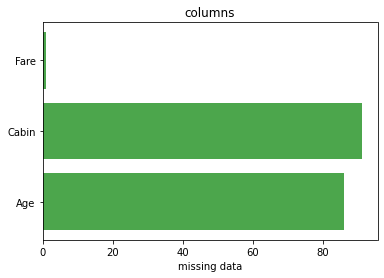

In [111]:
objects=('Age','Cabin','Fare')
y_pos=np.arange(len(objects))
miss=[86,91,1]
plt.barh(y_pos, miss, align='center', color='g',alpha=0.7)
plt.yticks(y_pos, objects)
plt.xlabel('missing data')
plt.title('columns')

In [112]:
#filling the missing  age
Test_set['Age'] =  Test_set[['Age',"Pclass"]].apply(missing_age_fill,axis=1)

In [113]:
Test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

in our final model model we dont have the passengerid , name , Parch ,Ticket , Fare ,Cabin , Embaarked

In [114]:
Test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Pclass
Age
SibSp
male

In [115]:
Test_set.drop(['PassengerId','Name','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [116]:
Test_set.head()

,Pclass,Sex,Age,SibSp,Survived
0,3,male,34.5,0,0
1,3,female,47.0,1,1
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [117]:
#dummies
dummy3 = pd.get_dummies(Test_set['Sex'],drop_first=True)

In [118]:
Test_set = pd.concat([Test_set,dummy3],axis=1)
Test_set.head()

,Pclass,Sex,Age,SibSp,Survived,male
0,3,male,34.5,0,0,1
1,3,female,47.0,1,1,0
2,2,male,62.0,0,0,1
3,3,male,27.0,0,0,1
4,3,female,22.0,1,1,0


In [119]:
#drop Sex column
Test_set.drop(['Sex'],axis=1,inplace=True)

In [120]:
Test_set.head()

,Pclass,Age,SibSp,Survived,male
0,3,34.5,0,0,1
1,3,47.0,1,1,0
2,2,62.0,0,0,1
3,3,27.0,0,0,1
4,3,22.0,1,1,0


divide into x and y

In [121]:
y_test=Test_set.pop('Survived')
x_test=Test_set

In [122]:
#minmaxscalling
x_test[['Pclass','Age']]=scaler.fit_transform(x_test[['Pclass','Age']])

In [123]:
x_test.head()

,Pclass,Age,SibSp,male
0,1.0,0.452723,0,1
1,1.0,0.617566,1,0
2,0.5,0.815377,0,1
3,1.0,0.353818,0,1
4,1.0,0.287881,1,0


In [124]:
x_test_sm = sm.add_constant(x_test)

In [125]:
y_test_pred = res3.predict(x_test_sm)

In [126]:
y_test_pred[:10]

0    0.067988
1    0.031689
2    0.067189
3    0.093571
4    0.094303
5    0.158565
6    0.582182
7    0.019297
8    0.708330
9    0.000363
dtype: float64

In [127]:
 # Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
# Let's see the head
y_pred_1.head()

,0
0,0.067988
1,0.031689
2,0.067189
3,0.093571
4,0.094303


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final

,Survived,0
0,0,0.067988
1,1,0.031689
2,0,0.067189
3,0,0.093571
4,1,0.094303
...,...,...
413,0,0.106034
414,1,0.919534
415,0,0.057151
416,0,0.106034


In [132]:
 # Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Servived_Prob'})

In [133]:
y_pred_final.head()

,Survived,Servived_Prob
0,0,0.067988
1,1,0.031689
2,0,0.067189
3,0,0.093571
4,1,0.094303


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Servived_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [135]:
y_pred_final.head()

,Survived,Servived_Prob,final_predicted
0,0,0.067988,0
1,1,0.031689,0
2,0,0.067189,0
3,0,0.093571,0
4,1,0.094303,0


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.8205741626794258

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[262,   4],
       [ 71,  81]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [139]:
test_sensitivity = TP / float(TP+FN)
test_sensitivity

0.5328947368421053

In [140]:
test_specificity = TN / float(TN+FP)
test_specificity

0.9849624060150376